In [131]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction import DictVectorizer
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from math import sqrt

### Set Up
The below simply defines a learning problem. We'll do binary classification, but add some noisiness to the labels to be realistic. We'll define some useful features and some useless ones

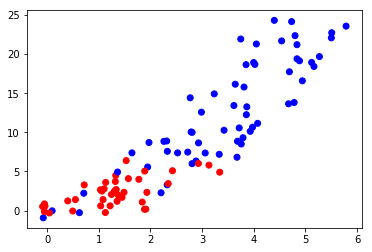

In [3]:
N = 100 # Number of training examples
D = 2 # Number of features
label_noise = 0.1

np.random.seed(47)

# this is the binary function we want our logistic regression to learn (but it is noisy)
def f(x):
    oops = np.random.uniform(0,1) <= label_noise
    return 1 if (x > 2.5 or oops) else 0 

def feature1(x):
    # this is a useful feature (albeit with some noise)
    return x + np.random.uniform(-1, 1, x.shape)

    # this feature is literally useless
    #return np.random.uniform(0, 5, x.shape)
    
def feature2(x):
    # this is a useful feature (albeit with some noise)
    return np.power(x, 2) + np.random.uniform(-1, 1, x.shape)

    # this feature is literally useless
    #return np.random.uniform(0, 25, x.shape)

# underlying set of points used to generate data
x = np.random.uniform(0, 5, N)  
# labels that we will try to predict
y = [f(xx) for xx in x]

# features
X = np.zeros((N, D)) 
X[:, 0] = feature1(x)
for i in range(1, D):
    X[:, i] = feature2(x) 

# plot the data
plt.scatter(X[:, 0], X[:, 1], color=['r' if yy == 0 else 'b' for yy in y])
plt.show()

### Train/Test Splits and Cross-Validation

Regular train/test
Train Accuracy 0.8625
Test Accuracy 1.0

Cross-validation train/test
Train:  0.8822222222222225
Test:  0.8699999999999999


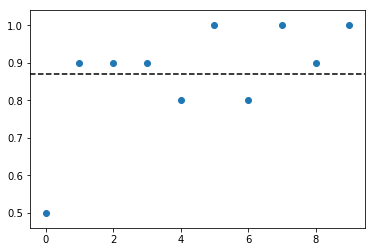

In [9]:
# Basic train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print("Regular train/test")
print("Train Accuracy", clf.score(X_train, y_train))
print("Test Accuracy",clf.score(X_test, y_test))
print()

# Evaluating with cross validation (gives better/more stable prediction of test performance)
n_fold = 10
train_accs = []
accs = []
for _ in range(n_fold):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    train_accs.append(clf.score(X_train, y_train))
    accs.append(clf.score(X_test, y_test))
    
print("Cross-validation train/test")
print("Train: ", sum(train_accs)/n_fold)
print("Test: ", sum(accs)/n_fold)
plt.scatter(np.arange(n_fold), accs)
plt.axhline(sum(accs)/n_fold, linestyle='--', color='k')
plt.show()

### Overfitting
The below is to illustrate using linear regression how increasing the number of features and/or increasing the weights attached to those features leads to more "wiggly" curves which are more likely to overfit/memorize the training data.

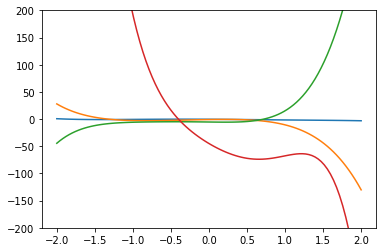

In [69]:
def arbitrary_poly(x, order=5, mn=-10, mx=10):
    coefs = np.random.uniform(mn, mx, order)
    #print(coefs)
    intercept = np.random.uniform(mn, mx, 1)
    y = 0
    for i in range(order):
        y += np.multiply(np.power(x, i+1), coefs[i])
    return y + intercept

# more features lead to wigglier functions--use l1 norm to penalize many non-zero coefficients
x = np.linspace(-2, 2, 100) 
#plt.plot(x, arbitrary_poly(x, order=1))
#plt.plot(x, arbitrary_poly(x, order=5))
#plt.plot(x, arbitrary_poly(x, order=10))
#plt.plot(x, arbitrary_poly(x, order=100))
#plt.ylim(-500, 500)
plt.show()

# higher coefficients lead to wigglier functions--use l2 norm to penalize large magnituge coefficients
plt.plot(x, arbitrary_poly(x, mn=-1, mx=1))
plt.plot(x, arbitrary_poly(x, mn=-5, mx=5))
plt.plot(x, arbitrary_poly(x, mn=-10, mx=10))
plt.plot(x, arbitrary_poly(x, mn=-100, mx=100))
plt.ylim(-200, 200)
plt.show()

When the number of training examples is less than or equal the number of features, we can
trivially overfit/memorize the training data (even when the features are literally random). 
This means the model can appear to do well at minimizing its objective, when its actually 
learning nothing at all

In [113]:
N = 1000 # Number of training examples
D = 1000 # Number of features

#np.random.seed(37)

def f(x):
    oops = np.random.uniform(0,1) <= 0.1
    return 1 if (x > 2.5 or oops) else 0 

def good_feature(x):
    return x + np.random.uniform(-1, 1, x.shape)

def correlated_feature(x):
    return good_feature(x) + np.random.uniform(-1, 1, 1)
   
def dumb_feature(x):
    return np.random.uniform(-5, 5, x.shape)
  
x = np.random.uniform(0, 5, N)  
y = [f(xx) for xx in x]

# features
X = np.zeros((N, D)) 
#X[:, 0] = good_feature(x)
X[:, 0] = dumb_feature(x)
for i in range(1, D):
    #X[:, i] = correlated_feature(x) 
    X[:, i] = dumb_feature(x) 

Train:  1.0
Test:  0.527


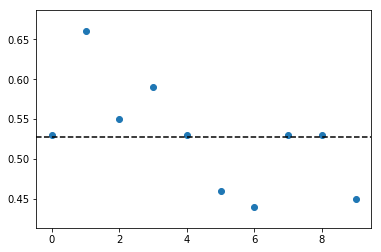

In [114]:
n_fold = 10
train_accs = []
accs = []
for _ in range(n_fold):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    train_accs.append(clf.score(X_train, y_train))
    accs.append(clf.score(X_test, y_test))
    
print("Train: ", sum(train_accs)/n_fold)
print("Test: ", sum(accs)/n_fold)
plt.scatter(np.arange(n_fold), accs)
plt.axhline(sum(accs)/n_fold, linestyle='--', color='k')

### Regularization (l1 and l2 norms)
Illustrates the computation of l1 and l2 norms

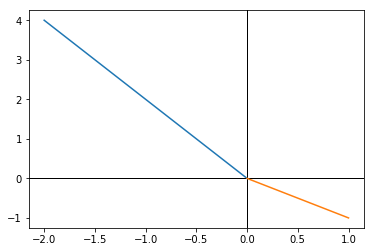

l1 norms
v1 6
v1 6.0
v2 2
v2 2.0
l2 norms
v1 4.47213595499958
v1 4.47213595499958
v2 1.4142135623730951
v2 1.4142135623730951


In [115]:
v1 = [-2, 4]
v2 = [1, -1]

def drawv(v):
    plt.plot([0, v[0]], [0, v[1]])

# returns the l1 norm--i.e. the sum of the absolute values of the elements
def l1_norm(v):
    return sum([abs(e) for e in v])

# returns the l2 norm--i.e. the sum of the squares of the values of the elements
def l2_norm(v):
    return sqrt(sum([e**2 for e in v]))

plt.axhline(0, color='k', lw=1)
plt.axvline(0, color='k', lw=1)
drawv(v1)
drawv(v2)
plt.show()

print("l1 norms")
print("v1", l1_norm(v1))
print("v1", np.linalg.norm(v1, ord=1))
print("v2", l1_norm(v2))
print("v2", np.linalg.norm(v2, ord=1))

print("l2 norms")
print("v1", l2_norm(v1))
print("v1", np.linalg.norm(v1, ord=2))
print("v2", l2_norm(v2))
print("v2", np.linalg.norm(v2, ord=2))

Illustrates overfitting with linear regression, and regularization with Lasso (L1 regularized) and Ridge (L2 regularized)

Train 0.9319449248647252
Test 0.7536271070712474


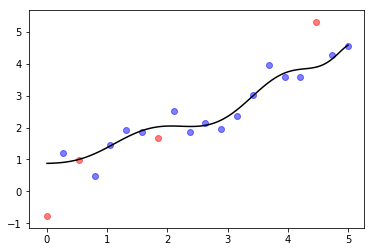

In [118]:
N = 20 # Number of training examples
D = 10 # Number of features
np.random.seed(47)

def learned_linreg(clf, x):
    pred = 0
    for i, w in enumerate(clf.coef_):
        pred += (w * (x**(i+1)))
        #pred += (w * (np.random.uniform(0, 5, x.shape)))
    pred += clf.intercept_
    return pred

def featurize(x):
    X = np.zeros((len(x), D)) 
    X[:, 0] = x
    #X[:, 0] = np.random.uniform(0, 5, x.shape)
    for i in range(1, D):
        X[:, i] = x**(i+1)
        #X[:, i] = np.random.uniform(0, 5, x.shape)
    return X

def f(x):
    return x + np.random.uniform(-1, 1, x.shape)

x = np.linspace(0, 5, N)
y = f(x)

#plt.scatter(x, y)
#plt.show()

X = featurize(x)    
X_train, X_test, y_train, y_test, x_train, x_test = train_test_split(X, y, x, test_size=0.2)
#clf = LinearRegression()
#clf = Lasso() # L1 regularized
clf = Ridge() #L2 regularized
clf.fit(X_train, y_train)
print("Train", clf.score(X_train, y_train))
print("Test", clf.score(X_test, y_test))

plt.scatter(x_train, y_train, color='b', alpha=0.5)
plt.scatter(x_test, y_test, color='r', alpha=0.5)
xsim = np.linspace(0, 5, 100)
#plt.plot(xsim, clf.predict(featurize(xsim)))
plt.plot(xsim, learned_linreg(clf, xsim), color='k')
plt.show()


Illustrates L1 vs L2 regularization in a text-based logistic regression

In [140]:
data = [l.strip().split('\t') for l in open('wine.txt').readlines()]
_X = [word_tokenize(review.lower()) for review, label in data]
y = [1 if len(label) > 3 else 0 for review, label in data]
_X = [{w: 1 for w in x} for x in _X]
dv = DictVectorizer()
X = dv.fit_transform(_X)
names = dv.get_feature_names()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
clf = LogisticRegression(penalty='l1')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

print(np.count_nonzero(clf.coef_))
for w, n in sorted(zip(clf.coef_[0], names), key=lambda e:e[0], reverse=True):
    print(w, n)

171
2.398593681145318 rusticity
2.1777893385314173 notes
2.1610076909270743 delicious
2.134705271761083 fantastic
2.114855077598168 lovely
2.021295860900927 stunning
1.9197340609270366 excellent
1.8454014572629067 beautifully
1.4738189571607745 long
1.3984964641688928 spices
1.3691263684069621 creamy
1.3670317280698965 scrapes
1.3463931933082098 property
1.2333547233488775 fine
1.1913807227499866 bare
1.1760145388278036 honied
1.0738609289081673 maderisation
1.0456146158105357 many
0.927844052828666 tannic
0.8801123680381301 tightly
0.853289063150922 even
0.8326247059675888 classic
0.8323389707496449 end
0.8272057070795342 gummy
0.823998677559899 peak
0.8086667227545409 meaty
0.7433175004399998 drink
0.6978985461659346 mineral
0.6945631144187537 rounded
0.6873338979865439 towards
0.6696894971646773 very
0.6571720969164998 given
0.6456756930658845 complex
0.6400957455616424 glorious
0.6292494328795185 really
0.5903346400672577 again
0.5896533898557006 bottle
0.5456630217895799 gamy
0.53

0.0 herby
0.0 here
0.0 hibiscus
0.0 high
0.0 high-oned
0.0 high-quality
0.0 high-toned
0.0 high-tonedness
0.0 higher
0.0 higher-toned
0.0 highest
0.0 highly
0.0 highly-wrought
0.0 hight-toned
0.0 hill
0.0 hint
0.0 hinting
0.0 hints
0.0 his
0.0 hit
0.0 hold
0.0 holds
0.0 hole
0.0 hollow
0.0 honey
0.0 honey-influenced
0.0 honeyed
0.0 honeysuckle
0.0 hope
0.0 hoped
0.0 hopefully
0.0 horrible
0.0 host
0.0 hot
0.0 hour
0.0 hours
0.0 house
0.0 how
0.0 however
0.0 hurry
0.0 i'dlike
0.0 ice-cream
0.0 icy
0.0 idea
0.0 ideal
0.0 ideally
0.0 idiosynchratic
0.0 idiosyncratic
0.0 if
0.0 immediate
0.0 impression
0.0 impressive
0.0 improvement
0.0 improving
0.0 in-between
0.0 in-your-face
0.0 inbetween
0.0 including
0.0 indeed
0.0 indication
0.0 indifferent
0.0 individuality
0.0 infants
0.0 inferior
0.0 influence
0.0 influenced
0.0 informative
0.0 initial
0.0 initially
0.0 inky
0.0 inner
0.0 insight
0.0 instance
0.0 insubstantial
0.0 integrated
0.0 intellectual
0.0 intellectually
0.0 intensity
0.0 in

0.0 sacrificing
0.0 sage
0.0 said
0.0 salty
0.0 same
0.0 samples
0.0 sancerre
0.0 sandrone
0.0 sangiovese
0.0 satisfying
0.0 sauternes
0.0 sauvage
0.0 sauvignon
0.0 sauvignon-like
0.0 savoury
0.0 says
0.0 scented
0.0 scentedness
0.0 scoff
0.0 score
0.0 scored
0.0 scraping
0.0 scribbled
0.0 scrutiny
0.0 seal
0.0 searing
0.0 secondary
0.0 sediment
0.0 sedimenty
0.0 see
0.0 seemed
0.0 seeming
0.0 seems
0.0 selection
0.0 self
0.0 sell
0.0 sells
0.0 semillon
0.0 sense
0.0 sensitive
0.0 sensory
0.0 sent
0.0 sepcially
0.0 serious
0.0 seriously
0.0 served
0.0 serving
0.0 sets
0.0 settle
0.0 seven
0.0 sexy
0.0 shade
0.0 shapliness
0.0 sherbert
0.0 sherberty
0.0 sherried
0.0 sherry
0.0 shifted
0.0 shipping
0.0 shiraz
0.0 shoe-polish
0.0 short
0.0 shorter
0.0 shortish
0.0 shortness
0.0 shout
0.0 shouting
0.0 show
0.0 shown
0.0 shows
0.0 showy
0.0 shrivelled
0.0 sickly
0.0 sicky
0.0 side
0.0 sign
0.0 signs
0.0 silex
0.0 silky
0.0 silky-testured
0.0 silky-textured
0.0 silkyily
0.0 similar
0.0 simpl

### Feature selection 
Illustrates one approach to feature selection, in which we iteratively remove the least useful features from training. There are many approaches to feature selection. There are lots of methods alread implemented in sklearn:
https://scikit-learn.org/stable/modules/feature_selection.html

In [119]:
# Set up so that we have features to de-select 

N = 100 # Number of training examples
D_good = 1 # Number of useful features
D_corr = 10 # Number of informative but correlated features
D_bad = 10 # Number of random features

def f(x):
    oops = np.random.uniform(0,1) <= 0.1
    return 1 if (x > 2.5 or oops) else 0 

def good_feature(x):
    return x + np.random.uniform(-1, 1, x.shape)

def correlated_feature(x):
    return good_feature(x) + np.random.uniform(-1, 1, 1)
   
def dumb_feature(x):
    return np.random.uniform(-5, 5, x.shape)
    
x = np.random.uniform(0, 5, N)  
y = [f(xx) for xx in x]

# features
X = np.zeros((N, D_good + D_corr + D_bad)) 
for i in range(D_good):
    X[:, i] = good_feature(x) 
for i in range(D_corr):
    X[:, D_good+i] = correlated_feature(x) 
for i in range(D_bad):
    X[:, D_good+D_corr+i] = dumb_feature(x) 

Train:  0.9211111111111112
Test:  0.78


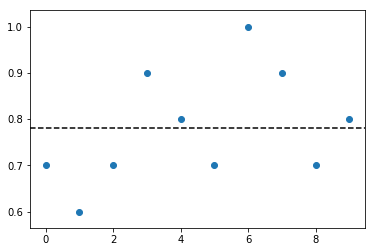

In [124]:
# Verify that we have overfitting happening
n_fold = 10
train_accs = []
accs = []
for _ in range(n_fold):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    train_accs.append(clf.score(X_train, y_train))
    accs.append(clf.score(X_test, y_test))
    
print("Train: ", sum(train_accs)/n_fold)
print("Test: ", sum(accs)/n_fold)
plt.scatter(np.arange(n_fold), accs)
plt.axhline(sum(accs)/n_fold, linestyle='--', color='k')

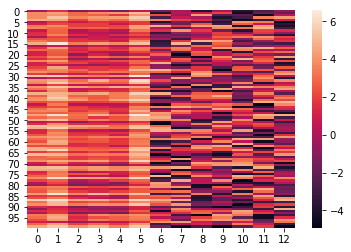

In [125]:
import seaborn as sns
from scipy.stats import pearsonr
# Look for correlated features
#plt.imshow(X)
sns.heatmap(X)
plt.show()

#rows, cols = X.shape
#for i in range(cols):
#    for j in range(cols):
#        rho, p = pearsonr(X[:, i], X[:, j])
#        print("%d\t%d\t%.03f"%(i, j, rho))

Illustrates the "Backward Elimination" Approach to feature selection--iteratively removing the least useful features until some stopping criteria is met


In [126]:
def xval(_X, _y, n_fold = 5):
    train_accs = []
    accs = []
    for _ in range(n_fold):
        X_tr, X_ts, y_tr, y_ts = train_test_split(_X, _y, test_size=0.1)
        clf = LogisticRegression()
        clf.fit(X_tr, y_tr)
        train_accs.append(clf.score(X_tr, y_tr))
        accs.append(clf.score(X_ts, y_ts))
    return sum(accs)/len(accs), clf
    
X_fulltrain, X_test, y_fulltrain, y_test = train_test_split(X, y, test_size=0.1)

X_filter = X_fulltrain

at_least_not_worse = True
acc = 0
tol = 0.1
to_remove = []
#while(at_least_not_worse):
while(len(to_remove) < 10):
    new_acc, clf = xval(X_filter, y_fulltrain)
    if new_acc + tol >= acc:
        acc = new_acc
        print("Accuracy is", acc)
        # remove least useful feature
        weights = [abs(w) for w in clf.coef_[0]]
        idx = weights.index(min(weights))
        print("Deleting feature", idx)
        to_remove.append(idx)
        X_filter = np.delete(X_filter, idx, axis=1)
    else:
        at_least_not_worse = False

Accuracy is 0.888888888888889
Deleting feature 2
Accuracy is 0.8666666666666666
Deleting feature 6
Accuracy is 0.7777777777777778
Deleting feature 10
Accuracy is 0.9333333333333332
Deleting feature 0
Accuracy is 0.888888888888889
Deleting feature 6
Accuracy is 0.9111111111111111
Deleting feature 3
Accuracy is 0.9333333333333332
Deleting feature 4
Accuracy is 0.9555555555555555
Deleting feature 4
Accuracy is 0.9555555555555555
Deleting feature 3
Accuracy is 0.8666666666666666
Deleting feature 0


(100, 13)
(100, 7)
Train:  0.9088888888888891
Test:  0.8400000000000001


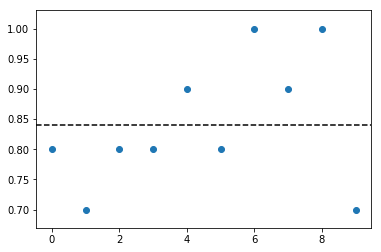

In [127]:
# See if things got better...?
print(X.shape)
X = np.delete(X, to_remove, axis=1)
print(X.shape)

n_fold = 10
train_accs = []
accs = []
for _ in range(n_fold):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    train_accs.append(clf.score(X_train, y_train))
    accs.append(clf.score(X_test, y_test))
    
print("Train: ", sum(train_accs)/n_fold)
print("Test: ", sum(accs)/n_fold)
plt.scatter(np.arange(n_fold), accs)
plt.axhline(sum(accs)/n_fold, linestyle='--', color='k')